**<h1>Conducting an Analysis of Intrusion Detection System Models using the NSL-KDD Dataset</h1>**

**<h2>Introduction</h2>**

The NSL-KDD dataset is a modified version of the well-known KDD Cup 99 dataset used for research in network intrusion detection. Here's a breakdown of its key points:
1. KDD Cup 99 Dataset:
* The original KDD Cup 99 dataset is a collection of labeled network connection data for network security research, particularly intrusion detection.
* It contains a large number of connection records (millions) classified as either "normal" or various types of attacks.
* However, the KDD Cup 99 dataset has some limitations:
    * It includes a significant number of redundant records.
    * The training and test sets are not well-separated, leading to potential overfitting of intrusion detection models.
2. NSL-KDD Dataset:
* The NSL-KDD dataset (NSL stands for ISCX Network Security Laboratory) addresses some of the shortcomings of the KDD Cup 99 dataset.
* It offers the following improvements:
    * Removes redundant records, leading to a more concise and efficient dataset.
    * Selects a more balanced representation of different attack types in the training and test sets.
    * Aims to be a more realistic representation of modern network traffic patterns.
Applications:
* The NSL-KDD dataset is still widely used for research and development in network intrusion detection systems (NIDS).
* Researchers can use it to train and evaluate machine learning models for identifying malicious network activity.
* It's a valuable resource for developing and improving intrusion detection techniques.

**<h2>1. Importing Libraries and Reading Dataset</h2>**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

In [4]:
df_0 = pd.read_csv("KDDTrain+.txt")
df = df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


In [5]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


**<h2>2. Dataframe Rows and Columns</h2>**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.000,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
src_bytes,125972.000,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125972.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125972.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125972.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


**<h2>3. Data Cleaning</h2>**

In this step, we look for any missing values in the dataset, which might end up skewing the dataset and causing potential biases. Overall, we can see that the dataset contains no missing values, in which case we can proceed with the data analysis.

In [9]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [10]:
# A helper function that lists information about unique values and value counts for specified columns in the dataframe.
def unique_values(df, columns):
    for column_name in columns:
        print(f"Column:{column_name}\n{'-' * 30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [11]:
cat_features = df.select_dtypes(include = 'object').columns
unique_values(df, cat_features)

Column:protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column:service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
   

Analyzing this data shows us that the data is a mix of communication protocols including TCP, ICMP and UDP, with TCP being the most commonly used. The data also reveals information about other protocols such as HTTP, FTP etc. along with a certain amount of private services. Additionally, it contains both regular and attack type traffic, specifically with Neptune and Satan attacks as the most common ones.

**<h2>4. Outliers</h2>**

This section of the project focuses on finding outliers in the different features of the dataset. We examine outliers for two key reasons. They can mess up statistical analysis by skewing the average and standard deviation, leading to false interpretations. Additionally, outliers might highlight data quality issues or display other issues in the form of figures, which makes it easier for the reader to understand any skewing data.

In [12]:
df.shape

(125972, 43)

<Figure size 2000x4000 with 0 Axes>

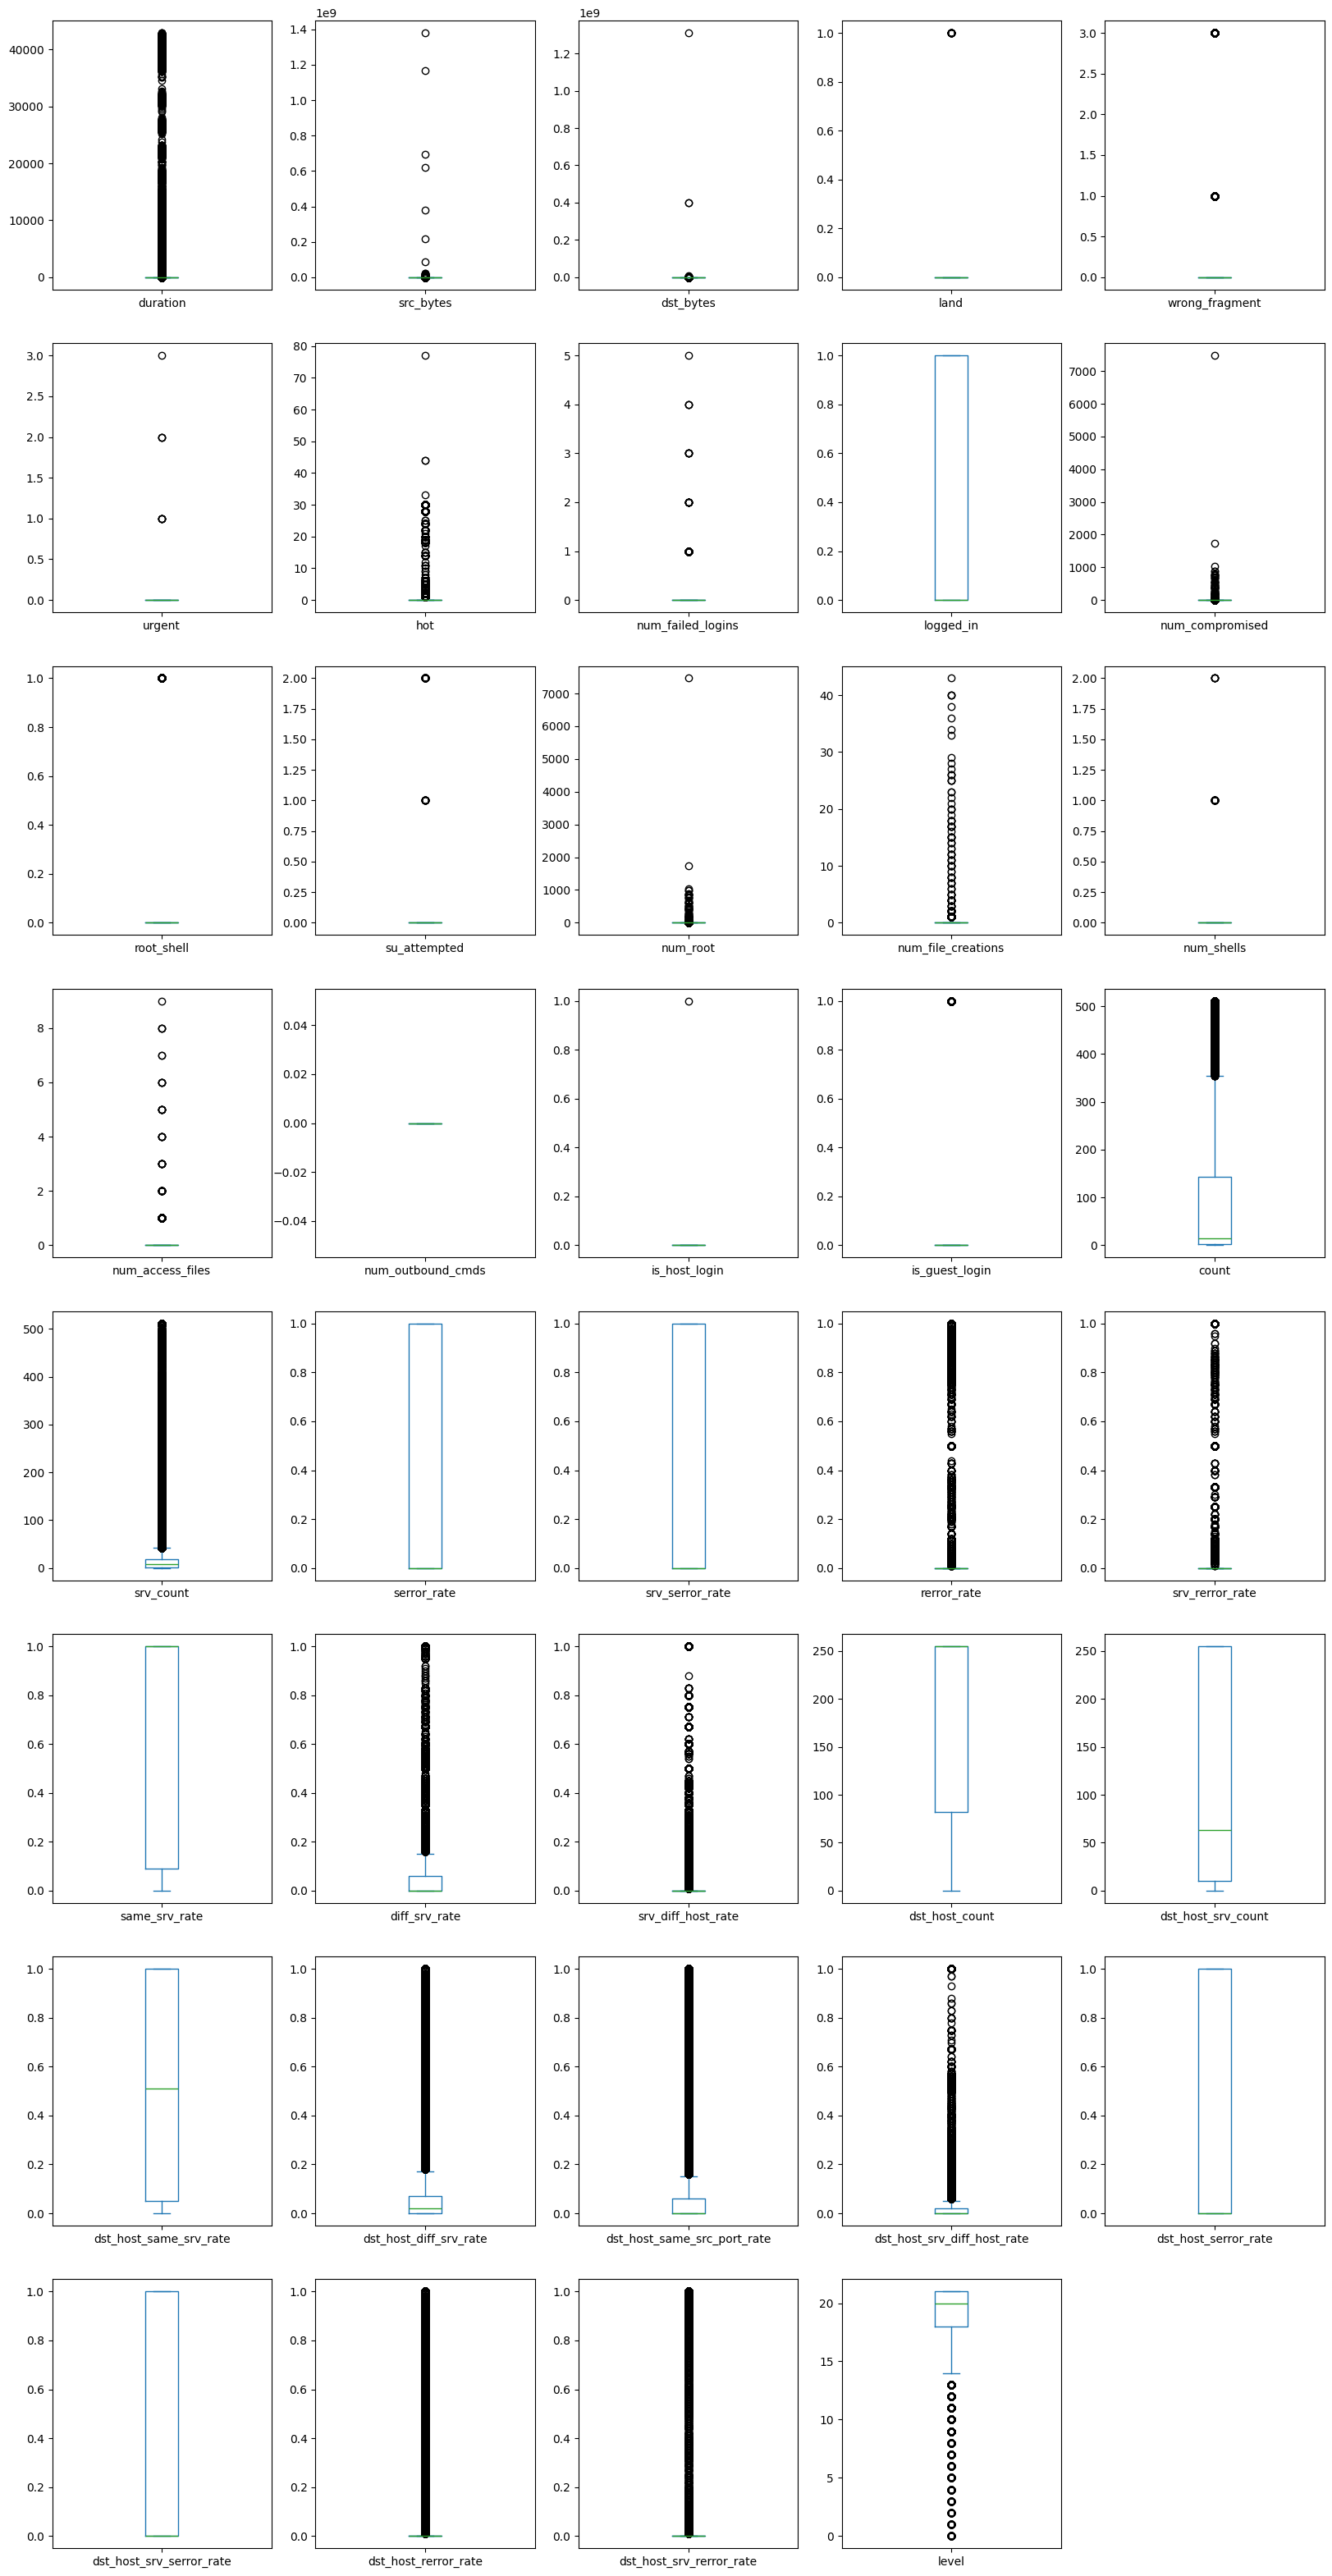

In [13]:
plt.figure(figsize=(20,40))
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(20,40))
plt.show()

**<h2>5. Classifying Data into Categories</h2>**

In [14]:
attack_n = []
for i in df.attack:
    if i == "normal":
        attack_n.append("normal")
    else:
        attack_n.append("attack")
df['attack'] = attack_n

In [15]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

This process simplifies the attack labels into two categories - "normal" and "attack" . This can be further used for easier analysis and also makes machine learning model training easier because this can be made into binary classification targets later on. 

**<h2>6. EDA - Visualizations</h2>**

Exploratory Data Analysis can be used for various purposes:

* Gain a general understanding of the data: This includes identifying data types, central tendencies like mean or median, spread, and the presence of missing values or outliers.
* Discover patterns and trends: Helps in visualizing relationships between variables using different types of figures.
* Formulate hypotheses: Based on the observations, initial questions or hypotheses can developed for further modeling or analysis.

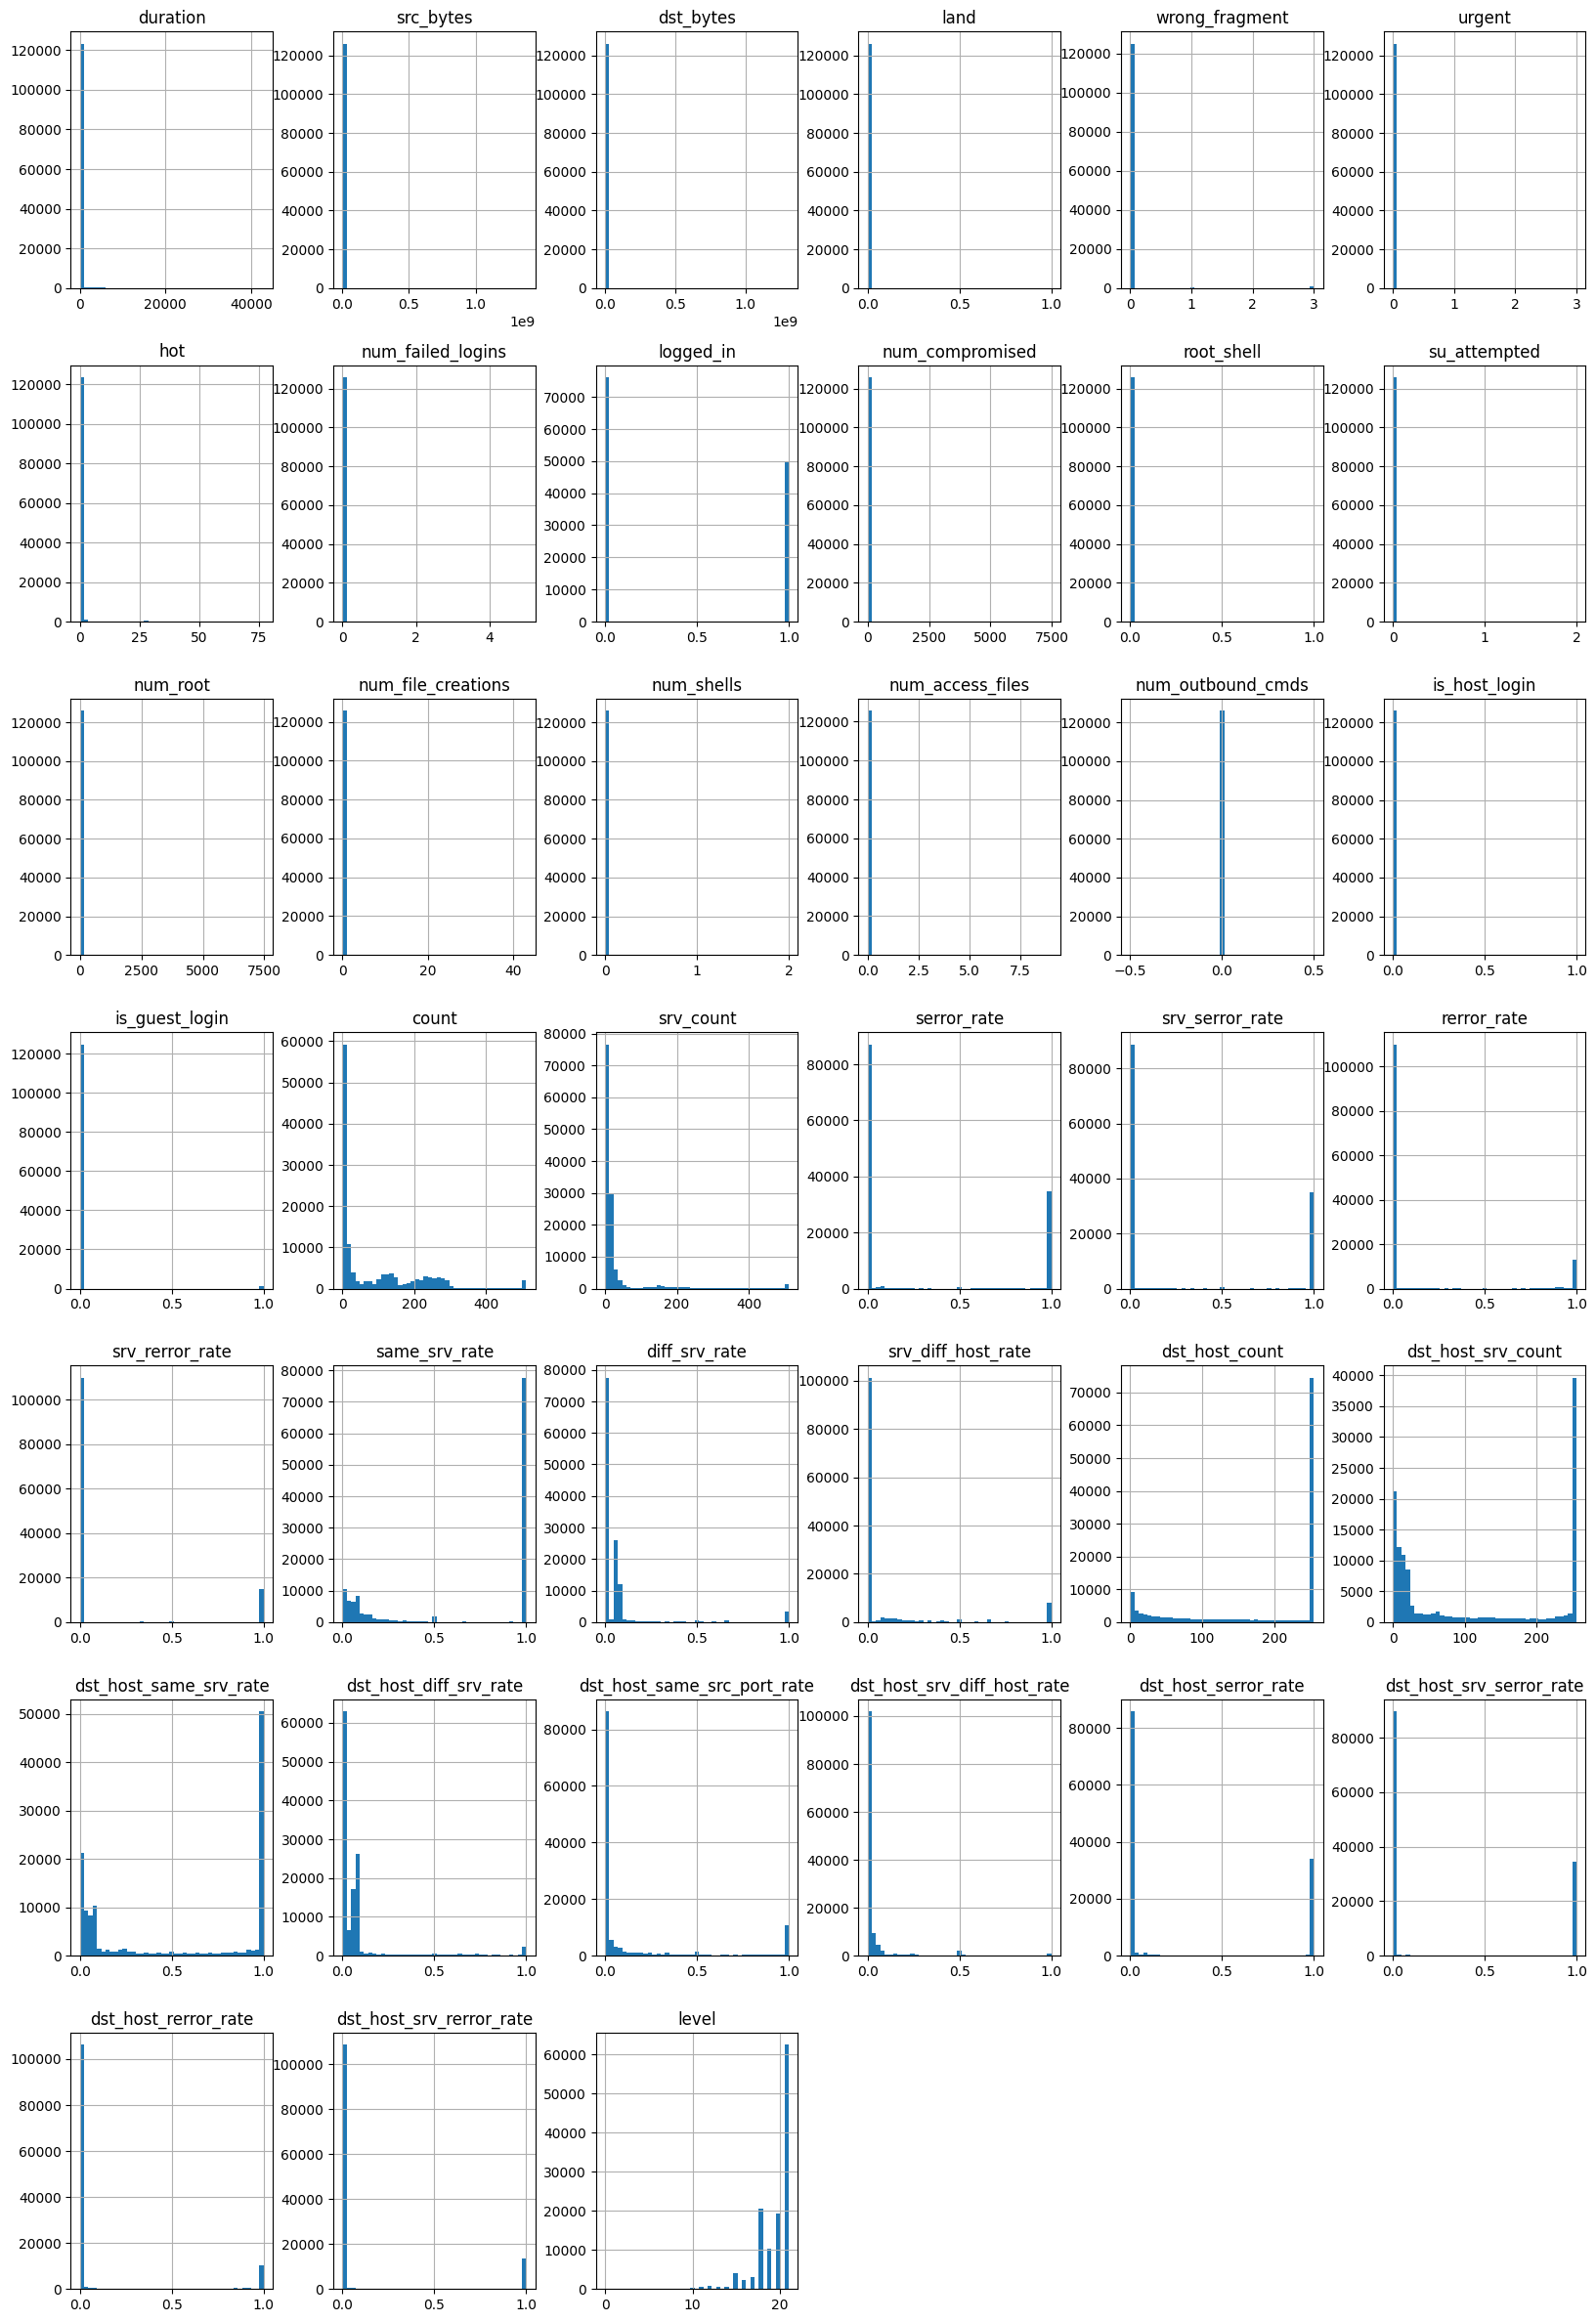

In [16]:
df.hist(bins=43, figsize = (20,30));

Based on the figures above, we can verify our earlier observation of there being multiple protocols such as ICMP, TCP, UDP, HTTP, FTP etc., with The value counts for protocol_type being the highest, which shows TCP is the dominant protocol, followed by UDP and ICMP. 

<h2>4.1 Protocol Type</h2>

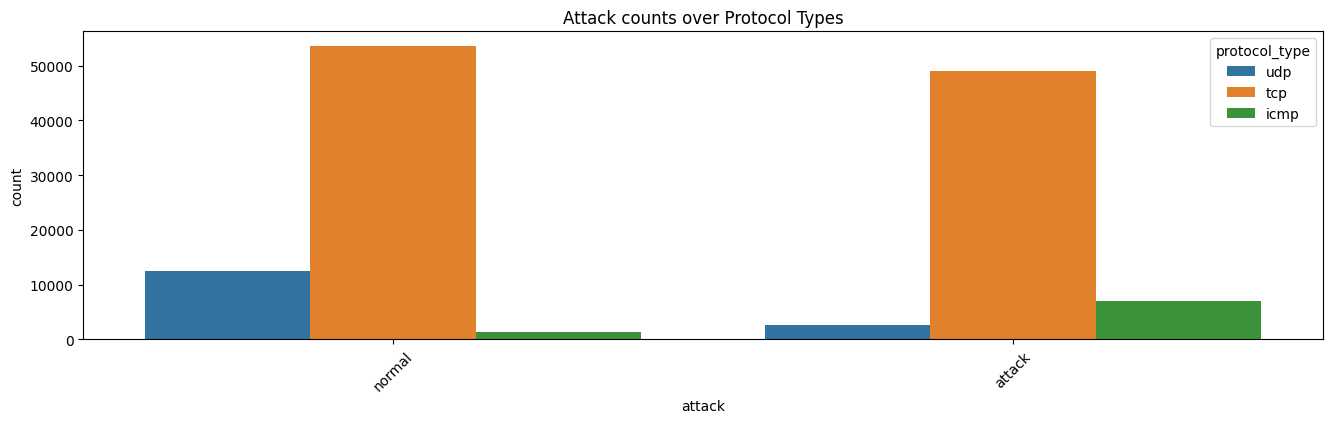

In [17]:
plt.figure(figsize = (16,4))
sns.countplot(x='attack',data=df,hue = 'protocol_type')
plt.xticks(rotation=45)
plt.title('Attack counts over Protocol Types')
plt.show()

In [18]:
df['protocol_type'].value_counts(normalize = True)

protocol_type
tcp    0.815
udp    0.119
icmp   0.066
Name: proportion, dtype: float64

Consequently, looking at the attack data we can see that TCP is the highest followed by UDP and ICMP, which is pretty normal for a real life network.

<h2>4.2 Service Used in General</h2>

/var/folders/8h/nbdbl9_j4kn99jw2fhn6vsj80000gn/T/ipykernel_58723/3290742531.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")


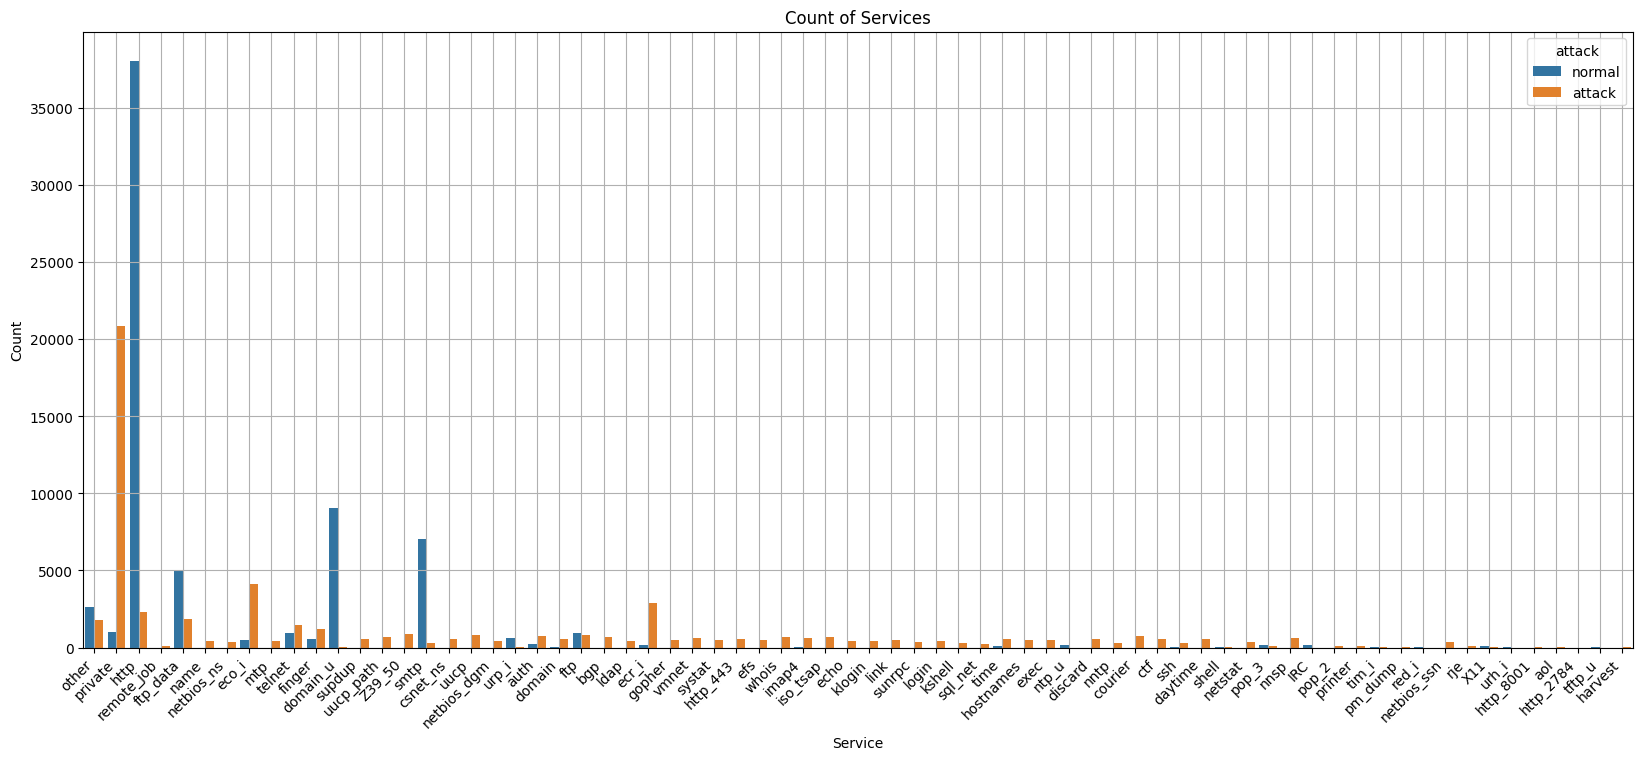

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,8))
ax = sns.countplot(x='service', hue = 'attack',data = df)
# ax.set_xticks(range(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right")
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

The network traffic data reveals a large collection of services being utilized on the network. Common services like HTTP (Hypertext Transfer Protocol), FTP (File Transfer Protocol), and SMTP (Simple Mail Transfer Protocol) are evident, indicating activities such as web browsing, file transfer, and email communication. 

**<h2>4.4 Kernel Density Estimate (KDE) Plot of Duration by Flag</h2>**

A kernel density estimate (KDE) plot is used to visualize the distribution of a numeric variable. In this case, the numeric variable is duration and the flag is a categorical variable. The x-axis of the graph represents duration, and the y-axis represents the density. The density curve shows the probability density of a data point occurring at a specific value on the x-axis.

<Figure size 1200x800 with 0 Axes>

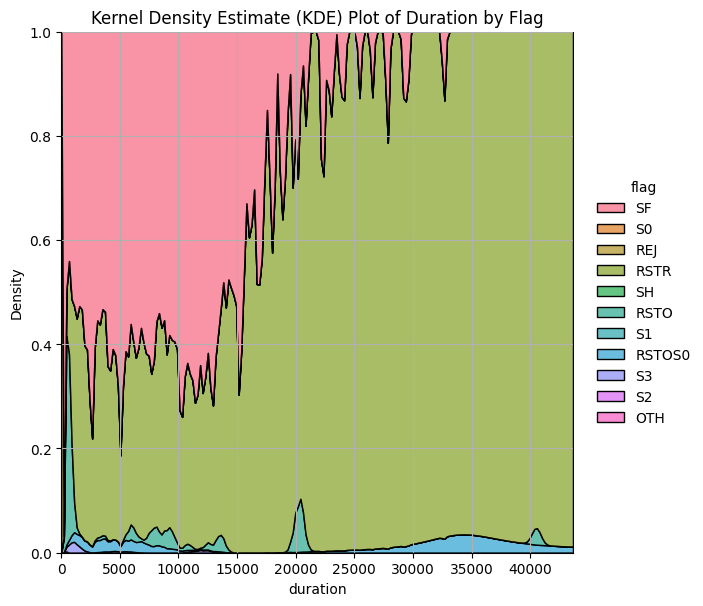

In [210]:
plt.figure(figsize = (12,8))
sns.displot(data=df, x="duration", hue = "flag", kind = "kde", height = 6, multiple = "fill", clip = (0, None), warn_singular = False)
plt.title("Kernel Density Estimate (KDE) Plot of Duration by Flag")
plt.grid(True)
plt.show()

In the context of the NSL-KDD dataset, the "SH" flag refers to the packet header flags in a TCP connection. These flags are single-bit indicators that signal specific connection behaviors. There are a large number of data points in the dataset with durations close to 10,000 for this flag, suggesting that durations for events associated with this flag tend to be around 10,000 frequently.

<h2>4.5 Distribution of Attack Types by Guest Login</h2>

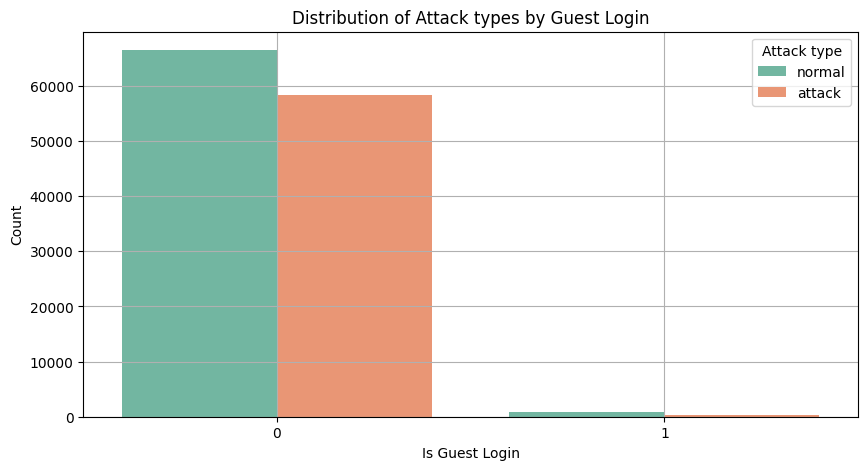

In [211]:
plt.figure(figsize = (10,5))
sns.countplot(x='is_guest_login', hue = 'attack', data = df, palette = 'Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack types by Guest Login')
plt.legend(title = 'Attack type')
plt.grid(True)
plt.show()

**<h2>5. Preprocessing</h2>**

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model. This can be done in various ways:

* Handling Null Values
* Standardization
* Handling Categorical Variables
* One-Hot Encoding
* Multicollinearity

This leads to our data being enhanced with the following advantages:

Better Models: Raw data has inconsistencies that hurt model performance. Preprocessing cleans the data for better results.
Faster Training: Preprocessing techniques like dimensionality reduction can make training faster by reducing the complexity of data.
Feature Engineering: Preprocessing can involve creating new features or transforming existing ones to improve their usefulness for the model.
Standardization: Preprocessing ensures all features are on a similar scale, preventing any one feature from dominating the model.

**<h2>5.1 Encoding</h2>**

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. In this case we have 4 columns which contain categorical data - protocol_type (TCP, UDP etc.), service, flag and attack, which are being converted into numerical values by the LabelEncoder utility from the sklearn library.

In [21]:
cat_features = df.select_dtypes('object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
clm = ['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x] = le.fit_transform(df[x])

**<h2>5.2 Train Test Split</h2>**

The train-test split provides a method of validating how well a machine learning model performs on unseen data, preventing overfitting and ensuring the model can generalize effectively to real-world scenarios. Here, we're using a split of 90% and 10%, which means that 10% of the data will be used for testing and the remaining 90% will be used for training, with the random_state parameter ensuring reproducibility.

In [26]:
from sklearn.model_selection import train_test_split

x = df.drop(["attack"], axis = 1)
y = df["attack"]

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.1, random_state = 43)

In [27]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

**<h2>5.3 Feature Engineering</h2>**

Feature engineering involves the extraction and transformation of variables from raw data, such as price lists, product descriptions, and sales volumes so that you can use features for training and prediction. This can involve:

* Selecting the most relevant features
* Creating new features from existing ones
* Transforming features to a format the model understands

In [28]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending = False)

src_bytes                     0.568
service                       0.469
dst_bytes                     0.440
flag                          0.368
same_srv_rate                 0.367
diff_srv_rate                 0.362
dst_host_srv_count            0.336
dst_host_same_srv_rate        0.312
logged_in                     0.293
dst_host_serror_rate          0.288
dst_host_diff_srv_rate        0.286
dst_host_srv_serror_rate      0.281
serror_rate                   0.279
srv_serror_rate               0.266
count                         0.265
dst_host_srv_diff_host_rate   0.187
level                         0.153
dst_host_count                0.146
dst_host_same_src_port_rate   0.131
srv_diff_host_rate            0.100
srv_count                     0.063
dst_host_srv_rerror_rate      0.063
protocol_type                 0.053
rerror_rate                   0.040
srv_rerror_rate               0.037
dst_host_rerror_rate          0.037
duration                      0.024
hot                         

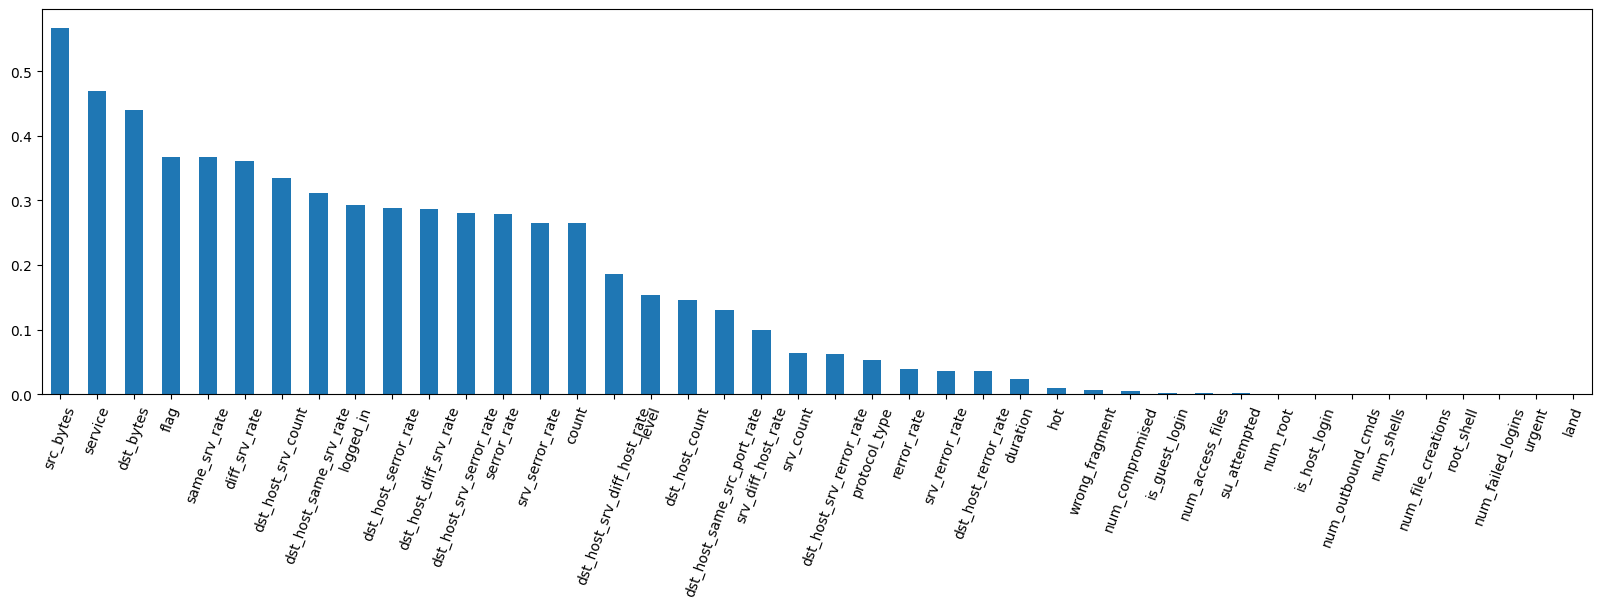

In [29]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (20,5), rot = 70);

<h2>5.4 Feature Selection</h2>

In [219]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k = 30)
Select_features.fit(X_train, Y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [220]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']


X_train=X_train[columns]
X_test=X_test[columns]

**<h2>5.5 Scaling</h2>**

Standardization is the process of putting different variables on the same scale. This process allows you to compare scores between different types of variables. A StandardScaler is a tool from the scikit-learn library used for standardization, referring to a technique that centers and scales features of a dataset. 

* Centering: It subtracts the mean value of each feature from each data point in that feature. This essentially moves the data to have a mean of zero.
* Scaling: It divides each data point in a feature by the standard deviation of that feature. This ensures all features are on a similar scale.

In [221]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**<h2>6. Model</h2>**

1. Logistic Regression: It is a statistical method that models the relationship between features and a binary target variable. It works by estimating the probability of a particular outcome (e.g., attack/normal ) occurring based on the input features. The base idea is to use a linear regression model to predict a continuous score, and then transform that score into a probability between 0 and 1 using a mathematical function called the sigmoid function. The sigmoid function essentially squashes the linear output between 0 and 1, making it suitable for probability prediction.

2. XGB Boost: XGBClassifier is an implementation of Gradient Boosting, which is an ensemble learning technique. Ensemble learning combines the predictions of multiple weak models, called decision trees to create a stronger final model. By strategically training these trees sequentially, the model can iteratively improve its predictions on the training data. This approach allows XGBoost to capture complex non-linear relationships between features, potentially leading to higher accuracy.

In [230]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [231]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state = 42)

In [233]:
XGBoost = XGBoost_model.fit(X_train, Y_train)

In [234]:
Logistic = Logistic_model.fit(X_train, Y_train)

In [235]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

In [277]:
def eval_metric(model, X_train, Y_train, X_test, Y_test):
    Y_train_pred = model.predict(X_train)
    Y_pred = model.predict(X_test)
    
    print("Test Set")
    print(confusion_matrix(Y_test, Y_pred))
    print(classification_report(Y_test, Y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(Y_train, Y_train_pred))
    print(classification_report(Y_train, Y_train_pred))

In [278]:
eval_metric(Logistic_model, X_train, Y_train, X_test, Y_test)

Test Set
[[5421  407]
 [ 233 6537]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5828
           1       0.94      0.97      0.95      6770

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598


Train_Set
[[49316  3486]
 [ 2140 58432]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     52802
           1       0.94      0.96      0.95     60572

    accuracy                           0.95    113374
   macro avg       0.95      0.95      0.95    113374
weighted avg       0.95      0.95      0.95    113374



In [242]:
eval_metric(XGBoost, X_train, Y_train, X_test, Y_test)

Test Set
[[5816   12]
 [   8 6762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5828
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Train_Set
[[52746    56]
 [   29 60543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52802
           1       1.00      1.00      1.00     60572

    accuracy                           1.00    113374
   macro avg       1.00      1.00      1.00    113374
weighted avg       1.00      1.00      1.00    113374



**<h2>6.1 Hyperparameter Tuning</h2>**

Hyperparameter tuning is the process of finding the optimal settings for a machine learning model's hyperparameters. These hyperparameters are dials you can adjust to control the model's learning process, but unlike regular parameters, they are not learned from the data itself.

Here's a breakdown of why it's important:

* Improved Model Performance: Choosing the right hyperparameter values can significantly impact the accuracy and generalizability of your model. By tuning these parameters, you can fine-tune the model's behavior and unlock its full potential.
* Avoiding Overfitting and Underfitting: Underfitting happens when the model is too simple and fails to capture the underlying patterns in the data. Overfitting occurs when the model memorizes the training data too well, including noise and irrelevant details, leading to poor performance on unseen data. Hyperparameter tuning helps find a balance between these extremes.

In this project, we make use of the Grid Search Technique, a technique in which we systematically evaluate a pre-defined set of values for each hyperparameter of a machine learning model. The grid search then trains the model with each combination of hyperparameters on a training dataset and evaluates its performance on a separate validation set and finally selects the combination of hyperparameters that leads to the best performance on the validation set.

In [243]:
param_grid = {
    "n_estimators": [50, 64, 100, 128],
    "max_depth": [2, 3, 4, 5, 6],
    "learning_rate": [0.01, 0, 0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [245]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state = 42) 

XGB_grid_model = GridSearchCV(XGB_model, param_grid, scoring = "f1", n_jobs = -1, return_train_score = True).fit(X_train, Y_train)

In [246]:
XGB_grid_model.best_score_

0.9983007226213312

In [247]:
XGB_grid_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 128,
 'subsample': 0.8}

<h2>6.2 Final Model</h2>

<h3>XGB Model</h3>

In [293]:
XGB_model = XGBClassifier(colsample_bytree = 0.5, learning_rate = 0.1, max_depth = 6, n_estimators = 128, subsample = 0.8)

XGB_model.fit(X_train, Y_train)

y_pred = XGB_model.predict(X_test)

In [294]:
Logistic_Regression_model = LogisticRegression()

Logistic_Regression_model.fit(X_train, Y_train)

y_pred = Logistic_Regression_model.predict(X_test)

**<h2>6.3 Evaluation</h2>**

Accuracy: Accuracy tells you what proportion of predictions the model got right (correct positives + true negatives divided by total data points).  While high accuracy is desirable, it can be misleading for imbalanced datasets.

Precision: Displays the proportion of the model's positive labels that are truly positive (true positives divided by total positive predictions). This metric is useful when false positives are costly.

Recall (Sensitivity): Complements precision by focusing on how well the model identifies all positive examples (true positives divided by total actual positive cases). A high recall means the model finds most of the relevant positive cases.

F1-score: Strikes a balance between precision and recall. A high F1-score (harmonic mean of precision and recall) means the model is good at finding relevant positive examples and avoiding false positives, making it a preferred metric for imbalanced datasets.

<h3>6.3.1 Logistic Regression Model</h3>

In [295]:
y_pred = Logistic_Regression_model.predict(X_test)
y_pred_proba = Logistic_Regression_model.predict_proba(X_test)

log_accuracy = accuracy_score(Y_test, y_pred)
log_recall = recall_score(Y_test, y_pred)
log_auc = roc_auc_score(Y_test, y_pred_proba[:,1])

print("Logistic Regression Model\n")
print(f'Accuracy: {log_accuracy}')
print(f'Recall: {log_recall}')
print(f'AUC Score: {log_auc}')

Logistic Regression Model

Accuracy: 0.9491982854421337
Recall: 0.9655834564254062
AUC Score: 0.9758755926921326


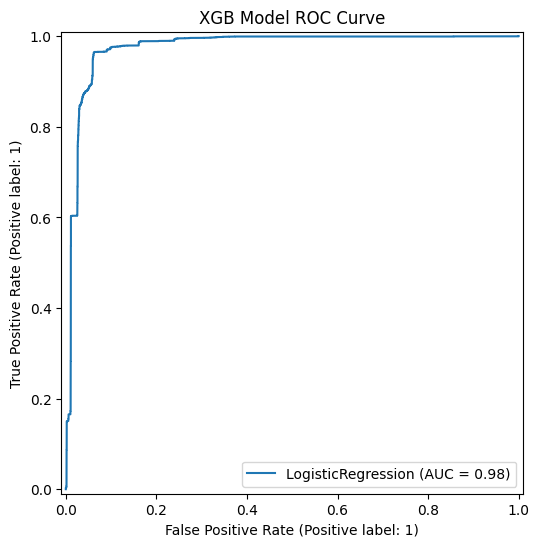

In [296]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(Logistic_Regression_model, X_test, Y_test);
plt.title("XGB Model ROC Curve")
plt.show()

<h3>6.3.2 XGB Model</h3>

In [297]:
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

xgb_accuracy = accuracy_score(Y_test, y_pred)
xgb_recall = recall_score(Y_test, y_pred)
xgb_auc = roc_auc_score(Y_test, y_pred_proba[:,1])

print("XGB Model\n")
print(f'Accuracy: {xgb_accuracy}')
print(f'Recall: {xgb_recall}')
print(f'AUC Score: {xgb_auc}')


XGB Model

Accuracy: 0.9980155580250833
Recall: 0.9988183161004431
AUC Score: 0.9999776203911439


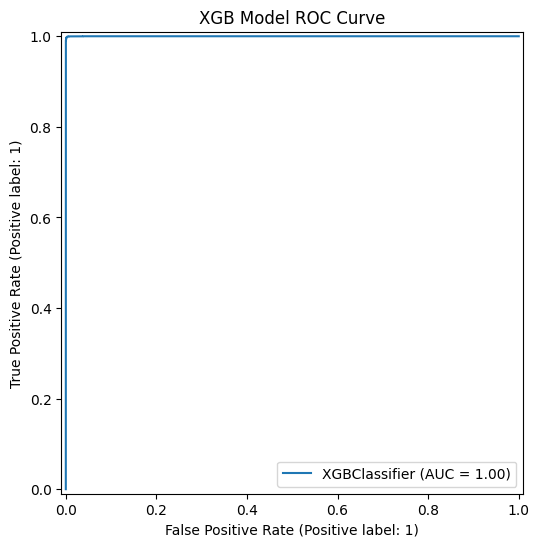

In [311]:
RocCurveDisplay.from_estimator(XGB_model, X_test, Y_test);
plt.title("XGB Model ROC Curve")
plt.show()

<h2>6.4 Feature Importance</h2>

In [314]:
model = XGB_model
model.feature_importances_

feats = pd.DataFrame(index = X[columns].columns, data = model.feature_importances_, columns = ['XGB_importance'])
ada_imp_feats = feats.sort_values('XGB_importance', ascending = False)
ada_imp_feats

,XGB_importance
dst_bytes,0.216
src_bytes,0.157
flag,0.139
logged_in,0.075
protocol_type,0.071
count,0.052
wrong_fragment,0.048
service,0.047
srv_serror_rate,0.038
hot,0.035


In [315]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [316]:
y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array(['normal', 'normal', 'attack', ..., 'normal', 'normal', 'attack'],
      dtype=object)

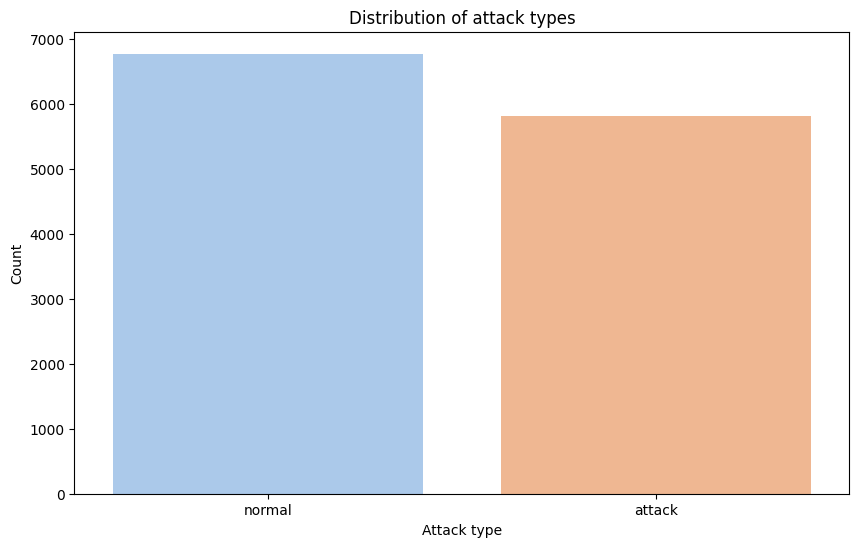

In [317]:
plt.figure(figsize = (10,6))
sns.countplot(x = y_pred_string, palette = "pastel")

plt.xlabel("Attack type")
plt.ylabel("Count")
plt.title("Distribution of attack types")
plt.show()